---
# <center> Лабораторна робота №10 </center>
## **Тема. Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена**
## **Мета:** навчитись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.
---

## <center> Хід роботи </center>

### **1.** Створюємо Notebook-документ і реалізовуємо контрольні приклади, що розглядаються у цій роботі, та виконуємо завдання, що надано на самостійну роботу.
### <center> Завдання для самостійної роботи </center>

#### **1)** Будуємо дерево кодів Гафмена згідно з варіантом, виданим викладачем вручну і візуалізовуємо дерево.

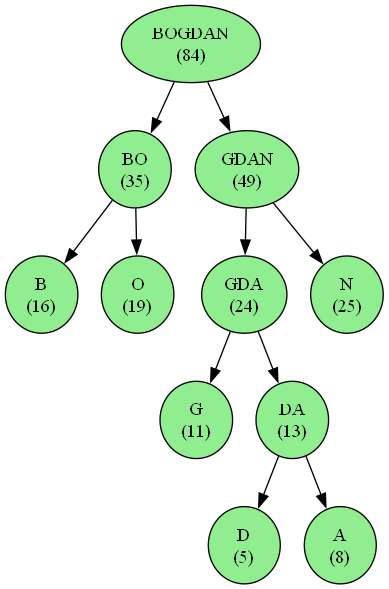

In [11]:
import heapq
from graphviz import Digraph
from IPython.display import display, Image

# Клас вузла дерева Гаффмана
class HuffmanNode:
    def __init__(self, frequency, symbol, left=None, right=None):
        self.frequency = frequency
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.frequency < other.frequency

# Функція для побудови дерева Гаффмана
def create_huffman_tree(symbols, frequencies):
    heap = []
    for symbol, freq in zip(symbols, frequencies):
        heapq.heappush(heap, HuffmanNode(freq, symbol))

    while len(heap) > 1:
        left_node = heapq.heappop(heap)
        right_node = heapq.heappop(heap)
        merged_node = HuffmanNode(left_node.frequency + right_node.frequency, left_node.symbol + right_node.symbol, left_node, right_node)
        heapq.heappush(heap, merged_node)

    return heap[0]

# Додавання вузлів до графа для візуалізації
def populate_graph(graph, node, parent_label=None):
    if node is not None:
        node_label = f"{node.symbol}\n({node.frequency})"
        graph.node(node_label, shape="ellipse", style="filled", fillcolor="lightgreen")
        if parent_label:
            graph.edge(parent_label, node_label)
        populate_graph(graph, node.left, node_label)
        populate_graph(graph, node.right, node_label)

# Візуалізація дерева Гаффмана
def render_huffman_tree(root_node):
    huffman_graph = Digraph(format="png")
    populate_graph(huffman_graph, root_node)
    return huffman_graph

# Символи та їх частоти
symbols = ['D', 'A', 'G', 'B', 'O', 'N']
frequencies = [5, 8, 11, 16, 19, 25]

# Побудова дерева Гаффмана
huffman_root = create_huffman_tree(symbols, frequencies)

# Генерація та відображення графа
tree_graph = render_huffman_tree(huffman_root)

display(Image(tree_graph.pipe(format='png')))

#### **2)** Перевіряємо результат за допомогою коду, наведеному вище.

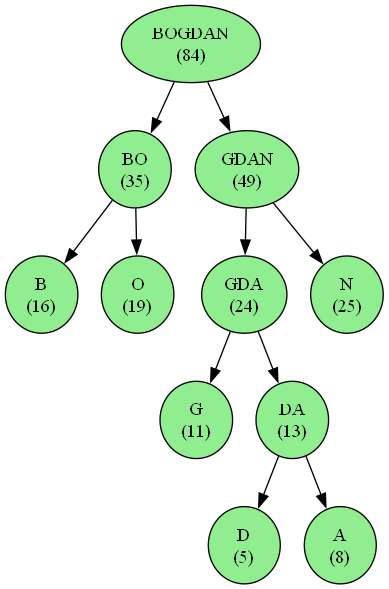

Huffman Codes:
B -> 00
O -> 01
G -> 100
D -> 1010
A -> 1011
N -> 11


In [15]:
import heapq
from graphviz import Digraph
from IPython.display import display, Image

# Клас вузла дерева Гаффмана
class HuffmanNode:
    def __init__(self, frequency, symbol, left=None, right=None):
        self.frequency = frequency
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''  # Атрибут для коду символу

    def __lt__(self, other):
        return self.frequency < other.frequency

# Функція для побудови дерева Гаффмана
def create_huffman_tree(symbols, frequencies):
    heap = []
    for symbol, freq in zip(symbols, frequencies):
        heapq.heappush(heap, HuffmanNode(freq, symbol))

    while len(heap) > 1:
        left_node = heapq.heappop(heap)
        right_node = heapq.heappop(heap)
        
        # Призначаємо коди вузлам
        left_node.huff = '0'
        right_node.huff = '1'

        merged_node = HuffmanNode(left_node.frequency + right_node.frequency, left_node.symbol + right_node.symbol, left_node, right_node)
        heapq.heappush(heap, merged_node)

    return heap[0]

# Додавання вузлів до графа для візуалізації
def populate_graph(graph, node, parent_label=None):
    if node is not None:
        node_label = f"{node.symbol}\n({node.frequency})"
        graph.node(node_label, shape="ellipse", style="filled", fillcolor="lightgreen")
        if parent_label:
            graph.edge(parent_label, node_label)
        populate_graph(graph, node.left, node_label)
        populate_graph(graph, node.right, node_label)

# Візуалізація дерева Гаффмана
def render_huffman_tree(root_node):
    huffman_graph = Digraph(format="png")
    populate_graph(huffman_graph, root_node)
    return huffman_graph

# Функція для виводу кодів Гаффмана
def print_huffman_codes(node, val=''):
    if node is not None:
        new_val = val + node.huff
        if node.left is None and node.right is None:
            print(f"{node.symbol} -> {new_val}")
        print_huffman_codes(node.left, new_val)
        print_huffman_codes(node.right, new_val)

# Символи та їх частоти
symbols = ['D', 'A', 'G', 'B', 'O', 'N']
frequencies = [5, 8, 11, 16, 19, 25]

# Побудова дерева Гаффмана
huffman_root = create_huffman_tree(symbols, frequencies)

# Генерація та відображення графа
tree_graph = render_huffman_tree(huffman_root)

display(Image(tree_graph.pipe(format='png')))

# Вивід кодів Гаффмана
print("Huffman Codes:")
print_huffman_codes(huffman_root)

#### **3)** Пишемо процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq


In [23]:
def calculate_char_frequencies(message):
    """
    Обчислює список символів та їх частоти у вхідному повідомленні.

    Parameters:
        message (str): Вхідне повідомлення.

    Returns:
        tuple: Два списки - список символів (chars) і список їх частот (freq).
    """
    from collections import Counter

    # Підрахунок частот символів
    counter = Counter(message)

    # Формування списків символів та їх частот
    chars = list(counter.keys())
    freq = list(counter.values())

    return chars, freq

# Приклад використання
message = "hello world"
chars, freq = calculate_char_frequencies(message)
print("Chars:", chars)
print("Freq:", freq)


Chars: ['h', 'e', 'l', 'o', ' ', 'w', 'r', 'd']
Freq: [1, 1, 3, 2, 1, 1, 1, 1]


#### **4)** Опрацьовуємо самостійно тему декодування Гафмена і скориставшись наведеним там кодом, декодуємо повідомлення, задане варіантом. (BOGDAN)


In [60]:
# Створення таблиці кодування Хаффмана
huffman_code = {
    'B': '101',
    'O': '1100',
    'G': '1101',
    'D': '111',
    'A': '0',
    'N': '100'
}

# Створення зворотної таблиці для декодування
reverse_huffman_code = {v: k for k, v in huffman_code.items()}

# Закодоване повідомлення
encoded_message = "101110011011110100"

# Декодування
decoded_message = ""
current_code = ""

# Перебір кожного біта закодованого повідомлення
for bit in encoded_message:
    current_code += bit  # додаємо біт до поточного коду
    if current_code in reverse_huffman_code:  # якщо код є в таблиці
        decoded_message += reverse_huffman_code[current_code]  # додаємо символ до повідомлення
        current_code = ""  # очищаємо поточний код

# Виведення результату
print("Закодоване повідомлення:", encoded_message)
print("Декодоване повідомлення:", decoded_message)


Закодоване повідомлення: 101110011011110100
Декодоване повідомлення: BOGDAN


### **2.** Надаємо відповіді на контрольні запитання.
### <center> Контрольні питання </center>

#### **1)** Що таке жадібні алгоритми?
Жадібні алгоритми — підхід, що обирає локально оптимальне рішення на кожному кроці, сподіваючись на глобальну оптимальність.

**Умови:**
- Оптимальна підструктура: Рішення задачі містить оптимальні рішення підзадач.
- Властивість жадібності: Локальний вибір веде до глобального оптимуму.

**Приклади:**
- Коди Гаффмана.
- Мінімальне остове дерево (алг. Прима, Крускала).
- Задача про рюкзак (з дробленням).

#### **2)** Що таке префіксний код? Який код використовується у коді Гафмена?
Префіксний код — це спосіб кодування, у якому жоден кодовий символ (послідовність бітів) не є префіксом іншого. Це забезпечує однозначне декодування.

Код Гафмена використовує префіксний код, оптимізуючи довжини кодових символів відповідно до частоти символів: більш часті символи мають коротші коди, а менш часті — довші.

#### **3)** Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?
Купа є основою для реалізації черги з пріоритетами.

Купа — це двійкове дерево, яке дотримується властивості впорядкованості: для мін-куп найменший елемент знаходиться в корені, а для макс-куп — найбільший.
Черга з пріоритетами — це структура, де елементи мають пріоритети, і доступ до елемента з найвищим пріоритетом є найшвидшим.

**Зв'язок:**

Купа забезпечує ефективне виконання операцій черги з пріоритетами:

- Додавання елемента: $O(\log n)$
- Вилучення елемента з найвищим пріоритетом: $O(\log n)$


#### **4)** Що таке стиснення даних і для чого воно використовується? Які його основні переваги?
Стиснення даних — це процес перекодування інформації з метою зменшення її обсягу, зберігаючи корисну інформацію.

**Основні цілі:**
- Економія місця: зменшення розміру файлів для зберігання.
- Прискорення передачі: зменшення часу та обсягу передачі даних через мережу.
- Оптимізація продуктивності: швидший доступ і обробка інформації.

**Основні переваги:**
- Зменшення витрат на зберігання й передачу даних.
- Підвищення ефективності роботи з великими наборами даних.
- Гнучкість для різних форматів і типів інформації.

#### **5)** Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена?
Для стиснення даних за допомогою алгоритму кодування Гафмена виконуємо такі кроки:

1. Підрахунок частот: Визначити частоту кожного символу у вхідному рядку.
2. Побудова дерева Гафмена:
- Використати частоти символів для створення вузлів дерева.
- Поєднувати вузли з найменшими частотами, поки не залишиться один кореневий вузол.

3. Призначення кодів: Пройтися по дереву, призначаючи "0" для лівої гілки та "1" для правої, створюючи префіксні коди символів.
4. Стиснення: Замінити символи їхніми бітовими кодами, створеними на попередньому кроці.
5. Зберігання дерева: Зберегти дерево для подальшого декодування.

Це забезпечує оптимальне стиснення за допомогою префіксного кодування.

#### **6)** Які основні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність?
Алгоритм Гафмена має обмеження: потребує зберігання дерева, ефективний лише за різних частот символів, малоефективний для невеликих даних і не враховує більші структури. Для покращення: застосовують адаптивне кодування, інші методи (арифметичне кодування) або комбінують із RLE.

#### **7)** . Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?
Альтернативи алгоритму Гафмена:
- Арифметичне кодування: Використовує діапазони для всього повідомлення.
- LZ77/LZ78: Кодують повторювані фрагменти.
- BWT (Бурроуза-Уиллера): Трансформує рядок для ефективного стиснення.
- RLE: Кодує послідовності однакових символів.
- Huffman-Lempel-Ziv: Комбінація Гафмена та LZ для покращення результатів.

#### **8)** Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах?
Алгоритми стиснення даних, зокрема алгоритм Гафмена, мають широке застосування в таких сферах:
- Стиснення файлів: Використовується в форматах .zip, .tar.gz для зменшення обсягу зберігання.
- Стиснення текстових даних: Алгоритм Гафмена застосовується в кодуванні для ефективного зберігання текстової інформації (наприклад, в eBooks).
- Стиснення зображень: У форматах, як JPEG, використовуються для зменшення розміру зображень.
- Мережеве стиснення: Алгоритми використовуються для зменшення розміру даних при передачі по мережах, що підвищує швидкість та знижує затримки.
- Кодування відео та аудіо: В кодеках (наприклад, MPEG, MP3) для стиснення відео та аудіо даних.
- Бази даних: Застосовується для стиснення великих наборів даних для зменшення витрат на зберігання та доступ.